In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately 
# to create a 360-degree view of the data. Use the same for the subsequent questions.
claims=pd.read_csv("D:\Pyhton\Pandas Case Study 3 - Insurance Claims Case Study\claims.csv")
cust_demo=pd.read_csv("D:\Pyhton\Pandas Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [3]:
claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
cust_demo.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
#there are customers who have not made any claims, still including them to get 360 degree view
insurance_claim=pd.merge(left=cust_demo, right=claims,left_on='CUST_ID',right_on='customer_id',how='left')
insurance_claim.drop(columns=['customer_id'],inplace=True)
insurance_claim.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [7]:
#2. Perform a data audit for the datatypes and find out if there are any mismatch within
# the current datatypes of the columns and their business significance.
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 15 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 136.5+ KB


In [8]:
#DateOfBirth object -> should be datetime64[ns]
#claim_date object -> should be datetime64[ns]
#claim_amount object -> should be float64

In [8]:
#3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.
insurance_claim.loc[:,'claim_amount']=pd.to_numeric(insurance_claim.claim_amount.str[1:])

In [9]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 15 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 136.5+ KB


In [10]:
#4.Of all the injury claims, some of them have gone unreported with the police. 
#Create an alert flag (1,0) for all such claims. 
insurance_claim.loc[:,'alert_flag']=np.where(insurance_claim.claim_id.isnull(),np.NaN,np.where(insurance_claim.claim_type.str.contains('njury'),np.where(insurance_claim.police_report=='Yes',0,1),0))

In [11]:
#5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved.
# However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records 
# in the data based on the customer ID column.

#converting data type to datetime for claim date
insurance_claim.loc[:,'claim_date']=pd.to_datetime(insurance_claim.claim_date,format='%m/%d/%Y')
#making copy and dropping duplicates
recent_claims=insurance_claim.drop_duplicates().sort_values(by=['CUST_ID','claim_date'], ascending = False).reset_index()
#dropping old dataframe indexes
recent_claims.drop(columns=['index'],inplace=True)
recent_claims.shape[0]

1092

In [12]:
#as rows in dataframe are sorted on claim date in descending order, keeping first would remove old records for each customer
recent_claims.drop_duplicates(['CUST_ID'],keep='first',inplace = True)
recent_claims.shape[0]

1085

In [13]:
recent_claims.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,99961993,Male,10-Jun-95,AL,234-943-2876,Platinum,47262068.0,Driver error,2018-10-23,Home,No,Material only,2310.0,1.0,No,0.0
1,99892000,Male,08-Jun-95,OR,395-246-6172,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0.0
2,99761663,Female,18-Nov-63,NC,643-246-4718,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0.0
3,99723844,Female,19-Jun-66,HI,457-752-1374,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0.0
4,99674324,Male,28-Jan-65,UT,517-562-4916,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,1.0


In [14]:
#6. Check for missing values and impute the missing values with an appropriate value. 
# (mean for continuous and mode for categorical) 
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
alert_flag             1085 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 145.0+ KB


In [15]:
#as customers with claim id null have not made any claims, hence removing those records for further analysis
insurance_claim = insurance_claim[(insurance_claim.claim_id.isnull() == False)]

In [16]:
#check the columns with missing values for imputation
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1091
Data columns (total 16 columns):
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null float64
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
alert_flag             1085 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 144.1+ KB


In [17]:
#only two columns have mising values
#claim_amount           1020 non-null float64 --This seems continuous hence missing values to be filled with mean 
#total_policy_claims    1075 non-null float64 -- float but seems categorial hence missing values to be filled with mode

#get the mode for total_policy_claims
policy_claims_mode = insurance_claim.total_policy_claims.mode()

#fill missing vlaues
insurance_claim["claim_amount"].fillna(insurance_claim["claim_amount"].mean(), inplace = True) 
insurance_claim["total_policy_claims"].fillna(policy_claims_mode[0], inplace = True)

In [18]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1091
Data columns (total 16 columns):
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
claim_id               1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1085 non-null float64
total_policy_claims    1085 non-null float64
fraudulent             1085 non-null object
alert_flag             1085 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 144.1+ KB


In [19]:
#function to get the age from DOB
import datetime
def find_age(dob):
    today = datetime.date.today()
    return today.year - dob.year # considering any fractional part of age in years as 1

In [20]:
#converting DateOfBirth from object to datetime, while taking care of century 
today = pd.Timestamp.now()
DOBList =[]

for date in pd.to_datetime(insurance_claim.DateOfBirth, format='%d-%b-%y'):
    if date>today : #century must be incorrect hence reducing 100 years
        date=date-pd.DateOffset(years=100)
    DOBList.append(date.strftime('%Y-%m-%d'))

insurance_claim.DateOfBirth = DOBList
insurance_claim.DateOfBirth = pd.to_datetime(insurance_claim.DateOfBirth,format='%Y-%m-%d')
#calculate age using the UDF find_age
insurance_claim.loc[:,'Age'] = insurance_claim.DateOfBirth.apply(lambda x : find_age(x))

In [21]:
age_bins = [0,18,30,60,110]
age_label=['Children','Youth','Adult','Senior']
insurance_claim.loc[:,'AgeGroup']=pd.cut(insurance_claim.Age,bins=age_bins,labels=age_label)

In [22]:
#8. What is the average amount claimed by the customers from various segments?
insurance_claim.groupby('Segment')['claim_amount'].mean().round(2)

Segment
Gold        12829.63
Platinum    12341.95
Silver      12208.44
Name: claim_amount, dtype: float64

In [23]:
#9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.
insurance_claim.claim_date=pd.to_datetime(insurance_claim.claim_date, format='%m/%d/%Y')
compare_date=pd.to_datetime('10/1/2018',format='%m/%d/%Y') - pd.DateOffset(days=20)
insurance_claim[insurance_claim.claim_date < compare_date].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64

In [24]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 
insurance_claim[(insurance_claim.AgeGroup == 'Adult') & insurance_claim.incident_cause.str.contains('river') & ((insurance_claim.State == 'TX') | (insurance_claim.State == 'DE') |(insurance_claim.State == 'AK') )].CUST_ID.count()

26

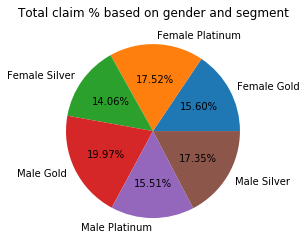

In [25]:
#11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
#Represent the claim amount as a percentage on the pie chart.
pie_gender_segment=insurance_claim.groupby(['gender','Segment'])['claim_amount'].sum()
labels=['Female Gold','Female Platinum','Female Silver','Male Gold','Male Platinum','Male Silver']
plt.title('Total claim % based on gender and segment')
plt.pie(pie_gender_segment,labels = labels,autopct='%1.2f%%')
plt.show()

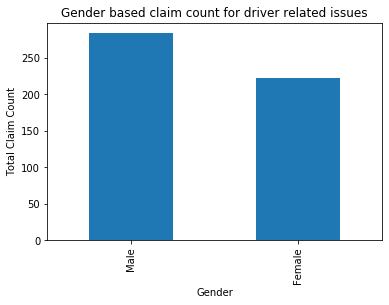

In [26]:
#12. Among males and females, which gender had claimed the most for any type of driver related issues?
# E.g. This metric can be compared using a bar chart
gender_driver_issue=insurance_claim[insurance_claim.incident_cause.str.contains('river')]
plt.title('Gender based claim count for driver related issues')
plt.xlabel('Gender')
plt.ylabel('Total Claim Count')
gender_driver_issue.gender.value_counts().plot(kind='bar')

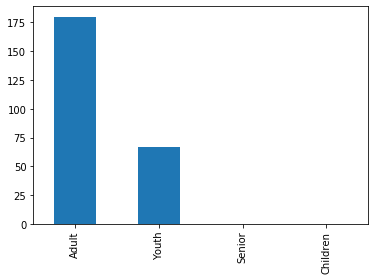

In [27]:
#13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
insurance_claim[insurance_claim.fraudulent == 'Yes'].AgeGroup.value_counts().plot(kind = 'bar')


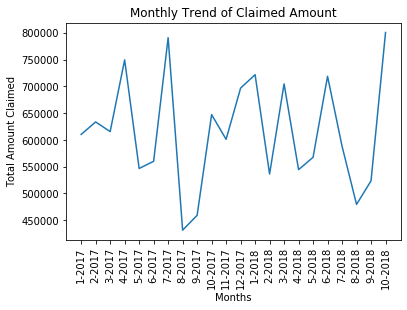

In [28]:
#14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
#Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 
insurance_claim.loc[:,'Monthly_claim_date'] = pd.to_datetime(insurance_claim.claim_date.dt.month.astype(str) + '-' + insurance_claim.claim_date.dt.year.astype(str), format='%m-%Y')
monthly_claim_trend=insurance_claim.groupby('Monthly_claim_date',as_index=False)['claim_amount'].sum().sort_values(by='Monthly_claim_date')
monthly_claim_trend.set_index(monthly_claim_trend.Monthly_claim_date.dt.month.astype(str) + '-' + monthly_claim_trend.Monthly_claim_date.dt.year.astype(str),inplace=True)
monthly_claim_trend.drop(columns=['Monthly_claim_date'],inplace=True)

plt.plot(monthly_claim_trend)
plt.xticks(monthly_claim_trend.index,rotation=90)
plt.xlabel('Months')
plt.ylabel('Total Amount Claimed')
plt.title('Monthly Trend of Claimed Amount')
plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


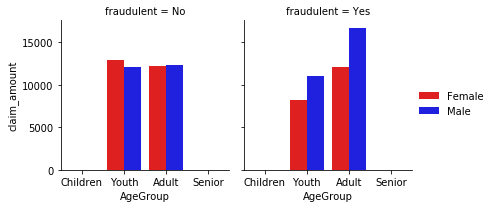

In [29]:
#15. What is the average claim amount for gender and age categories and 
#suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims
#and the other for non-fraudulent claims.
import seaborn as sns

avg_claim=insurance_claim.groupby(['gender','AgeGroup','fraudulent'],as_index=False)['claim_amount'].mean()
facet_chart=sns.FacetGrid(avg_claim,col='fraudulent')

facet_chart=facet_chart.map(sns.barplot,'AgeGroup','claim_amount','gender',palette=['r','b'])
facet_chart.add_legend()
plt.show()

# Part 2 - Stats

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

In [30]:
import scipy.stats as stats

In [32]:
Males_claim = insurance_claim.claim_amount[insurance_claim.gender == 'Male']
Females_claim = insurance_claim.claim_amount[insurance_claim.gender == 'Female']

In [33]:
print (Males_claim.mean())
print (Females_claim.mean())

12853.058506136278
12062.634706623674


In [34]:
stats.ttest_ind(a = Males_claim, b = Females_claim) # by default equal_var is true

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

In [35]:
stats.ttest_ind(a = Males_claim, b = Females_claim,equal_var=False)

Ttest_indResult(statistic=0.9746136200857317, pvalue=0.3299696522030814)

In [37]:
t=pd.crosstab(insurance_claim.AgeGroup, insurance_claim.Segment, margins =True) #margins would give rows and columns sub totals
t

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Youth,100,111,96,778
Adult,275,251,252,307
All,375,362,348,1085


In [38]:
stats.chi2_contingency(t)

(410.20309871033885,
 1.7892524749884148e-85,
 6,
 array([[ 187.5,  181. ,  174. ,  542.5],
        [ 187.5,  181. ,  174. ,  542.5],
        [ 375. ,  362. ,  348. , 1085. ]]))

In [53]:
StartDate=pd.to_datetime('2017/04/01' , format = '%Y/%m/%d')
EndDate=pd.to_datetime('2018/03/31' , format = '%Y/%m/%d')
Claim_Amount_2017_2018=insurance_claim[(insurance_claim.claim_date >= StartDate) & (insurance_claim.claim_date <= EndDate)]['claim_amount']
stats.ttest_1samp(a = Claim_Amount_2017_2018, popmean = 10000)

Ttest_1sampResult(statistic=5.159247697108386, pvalue=3.420299480441544e-07)

In [54]:
Claim_Amount_2017_2018.mean() # mean for fiscal year 2017-2018

12948.367800511516

In [58]:
insurance_claim.AgeGroup.value_counts()
#as senior and Children have no representation in data, hence moving fwd with Adult and Youth

Adult       778
Youth       307
Senior        0
Children      0
Name: AgeGroup, dtype: int64

In [64]:
Adult_calims = insurance_claim[insurance_claim.AgeGroup == 'Adult']['claim_amount']
Youth_calims = insurance_claim[insurance_claim.AgeGroup == 'Youth']['claim_amount']
print (Adult_calims.var())
print (Youth_calims.var())

181991644.25993067
169960241.10593238


In [65]:
stats.f_oneway(Adult_calims, Youth_calims)

F_onewayResult(statistic=0.9642714131134505, pvalue=0.326332352736338)

In [ ]:
Conclusion: P-Value is very high (0.326332352736338). 
            Hence accepting the Ho (null hypothesis) 
            There is no difference in claims made by different age groups 
Business conclusion is that: pricing, marketing and other strategies on insurance policy can be done alike
for all age groups.

In [68]:
stats.pearsonr(insurance_claim.total_policy_claims, insurance_claim.claim_amount)

(-0.017952953318902988, 0.5547051246393566)

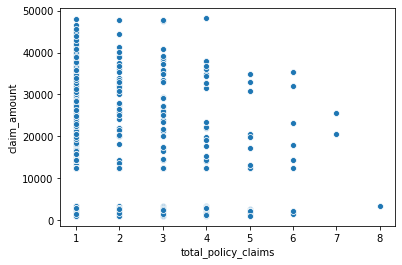

In [69]:
sns.scatterplot(insurance_claim.total_policy_claims, insurance_claim.claim_amount)

In [ ]:
Conclusion: The co-relation co-efficient is very small (-0.017952953318902988). 
            Weak correlation hence concluding that there is no relationship between them 
Business conclusion is that: total policy claim has no relaiton with aclaim mount 
                             Both should be considered independent to each other